<a href="https://colab.research.google.com/github/enriqueasegura/Exercises/blob/master/SUSY_Logistic_Regression_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Notebook's Goal

We will use a data from a science or engineering field, in this case 
SUSY Data Set,  and apply machine learning methods (regression, decision tress, xgboost, neural networks) to analyze the data.

In this notebook we have chosen logistic regression as the machine learning method to analyze the SUSY data.

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
import pandas as pd
import scipy as sci 

import matplotlib
from matplotlib import rc

from sklearn.metrics import accuracy_score
from matplotlib.pyplot import imshow

from __future__ import division  # floating point division

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function 

from sklearn import metrics
from sklearn import preprocessing 
import tensorflow as tf
#from tensorflow.contrib import learn from tensorflow.contrib import learn import pandas as pd

#Machine Learning Part

Our task is use logistic regression to separate the signal events from the background events.

The signal events are labeled with 1 while the background sample are labeled with 0. This can be found in the first column.


#Attribute Information:

The first column is the class label (1 for signal, 0 for background), followed by the 18 features (8 low-level features then 10 high-level features). 

low-level features:

0. class label (1 for signal, 0 for background)
1. lepton 1 pT 
2. lepton 1 eta
3. lepton 1 phi
4. lepton 2 pT
5. lepton 2 eta
6. lepton 2 phi
7. missing energy magnitude
8. missing energy phi

High level-features:

9. MET_rel,
10. axial MET
11. M_R
12. M_TR_2
13. R
14. MT2
15. S_R
16. M_Delta_R
17. dPhi_r_b,
18. cos(theta_r1). 

For detailed information about each feature see the original [paper](https://arxiv.org/pdf/1402.4735.pdf).



In [3]:
cols_names = ["Signal/Background",
              "lepton 1 pT",
              "lepton 1 eta",
              "lepton 1 phi",
              "lepton 2 pT",
              "lepton 2 eta",
              "lepton 2 phi",
              "missing energy magnitude",
              "missing energy phi",
              "MET_rel", 
              "axial MET",
              "M_R",
              "M_TR_2",
              "R",
              "MT2",
              "S_R",
              "M_Delta_R",
              "dPhi_r_b",
              "cos(theta_r1)"]

cols_names

['Signal/Background',
 'lepton 1 pT',
 'lepton 1 eta',
 'lepton 1 phi',
 'lepton 2 pT',
 'lepton 2 eta',
 'lepton 2 phi',
 'missing energy magnitude',
 'missing energy phi',
 'MET_rel',
 'axial MET',
 'M_R',
 'M_TR_2',
 'R',
 'MT2',
 'S_R',
 'M_Delta_R',
 'dPhi_r_b',
 'cos(theta_r1)']

# Some Notes to keep in mind 

Given $N$ data points and $M$ features, you want to create one $N \times M$ matrix $X$ (your design/feature matrix), and one $N \times 1$ vector (you label vector)

1. Feature matrix $X$ and label vector $y$.
2. Feed $X$ and $y$ into some classifier from sklearn.

Key point: 

1. Shuffle data so there are adjacent rows are not correlated. 
2. Split the data into training/testing sets (usually 80/20 split).


In [0]:
#we query UCI's archive to obtain the data set.

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz', compression='gzip',
                   error_bad_lines=False, header=None)

In [5]:
print('Complete, unseparated data set:')

Complete, unseparated data set:


In [6]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


In [7]:
#we add the feature names to the data set to better aid in the data analysis.

data.columns = cols_names
data

,Signal/Background,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


In [0]:
#we separate the target vector from the feature matrix to start the ground work for 
#model training 

y = data['Signal/Background']

In [9]:
print('Target Vector:')

Target Vector:


In [10]:
pd.DataFrame(y)

,Signal/Background
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
4999995,1.0
4999996,0.0
4999997,0.0
4999998,1.0


In [0]:
X = data.loc[:,'lepton 1 pT':]

In [12]:
print('Feature Matrix:')
X

Feature Matrix:


,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


#Showcasing Features 

Below you will find the distribution of the 

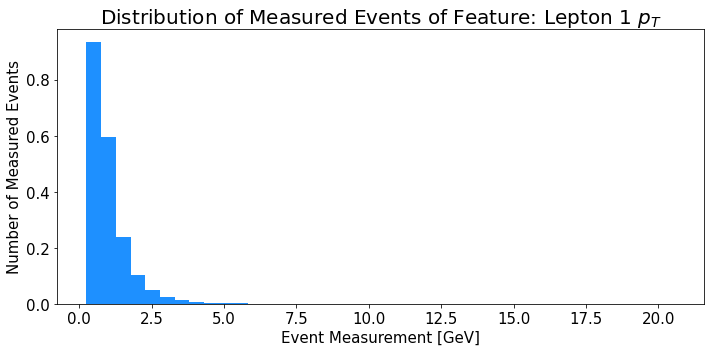

In [13]:
plt.figure(figsize=(10,5))  

plt.hist(data['lepton 1 pT'], bins=40, color='dodgerblue', density=True)

plt.ylabel('Number of Measured Events', fontsize=15)
plt.xlabel('Event Measurement [GeV]', fontsize=15)

plt.tick_params(labelsize=15)
plt.title(r'Distribution of Measured Events of Feature: Lepton 1 $p_T$ ', fontsize=20)

plt.tight_layout()

#Benchmarking: Calculating Worst Case Scenario

In this section we are interesting in doing a rough approximation to answer the following question: what is the worst performance a model can have in identifying the signal from the background noise in this data set? 

For that we will do a very straight forward approach: to count the representation of signal and background on the target vector. 

Having this information can help us understand a bit what does it mean a worst case scenario. 




In [14]:
#let's check this against the expected value for signal and noise
#we are using a for-loop to better highlight the counting rather than any advanced#
#numpy methods 

#arrays to keep the amount of counts for each category. 

signal_count =[]
background_count = []

#loop with the booleans to separate signal from background
for i in y:
  if i == 0:
    background_count.append(i)
  if i == 1:
    signal_count.append(i)

#the proportions
print('Proportion Percentage of Signal and Background Noise:', 100*np.size(signal_count)/np.size(y), 100*np.size(background_count)/np.size(y))

Proportion Percentage of Signal and Background Noise: 45.75654 54.24346


We did this estimation on the target vector to estimate the proportion of signal and background before training on the model. 

So what can we learn about the 46/54 proportions? We know that at the worst case scenario, the model should at the very least yield a background reading of at least 54%. 

If our model's accuracy is below this value, our model is not accurate. 

Thus this is a benchmark we are going use to compare against the model's accuracy. 

Now that we have the Features Matrix and the Target vector, we can take SUSY data in its the full feature space and apply the regression model.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [0]:
clf = LogisticRegression(random_state=0,max_iter = 4000)

In [17]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=4000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred_train = clf.predict(X_train)
expected = y_train

In [19]:
print('Score Training Accuracy Logistic Regression: ',100*accuracy_score(y_train, pred_train))

Score Training Accuracy Logistic Regression:  78.829475


In [20]:
#prediction against data 
model_test_data = clf.predict(X_test)
print('Score Accuracy Testing Logistic Regression: ',100*accuracy_score(y_test, model_test_data))

Score Accuracy Testing Logistic Regression:  78.84870000000001


#Model's Performance vs Benchmark

We can conclude that this model has succesfully beaten the benchmark established at the beginning of this notebook to identify an input as signal\background. 